# EDA

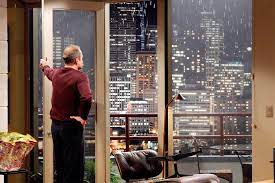

## Setup

In [274]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understanding the Data 

### Import the external .csv 

In [275]:
# following query variables are used while creating the .csv files from the sql database
# files are obtained through a connection via psycopg2
query_multiples = "SELECT house_id, count(*) AS c0unt FROM (SELECT kchd.*, kchs.* FROM eda.king_county_house_details kchd INNER JOIN eda.king_county_house_sales kchs ON kchd.id = kchs.house_id) AS jt GROUP BY jt.house_id HAVING count(*) > 1"
query_left_joined = "SELECT  kchd.*,kchs.date, kchs.price FROM eda.king_county_house_details kchd LEFT JOIN eda.king_county_house_sales kchs ON  kchd.id = kchs.house_id"


df = pd.read_csv("data/eda_left_joined.csv")
dupl = pd.read_csv("data/multiple_sales.csv")

# additional .csv data for golf courts 
df_golf = pd.read_csv("data/golf_courses_king_county.csv")

In [276]:
df.head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [350]:
df['date'].sort_values().value_counts()

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2015-01-17      1
2015-01-31      1
2015-02-15      1
2014-08-30      1
2015-05-27      1
Name: count, Length: 372, dtype: int64

In [277]:
df.shape

(21597, 21)

Now I want to check some basic descriptive stats about the data

In [278]:
# summary of statistics
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [279]:
#checking for counts of missing values in each column
df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [280]:
# summary of dataframe, data types and null-counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [281]:
# wanted to check correlation matrix but because of 'date' column it fails, need cleaning
#df.corr()

In [282]:
# check for total number of missing values in the dataframe, for fun
print(df.isnull().sum().sum())

6754


In [283]:
#check for continuous and categorical features
cont_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Continuous Features: ", cont_features)

categ_feat = df.select_dtypes(include=['object', 'category', 'bool']).columns
print("Categorical Features: ", categ_feat)

Continuous Features:  Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')
Categorical Features:  Index(['date'], dtype='object')


### First insights/impressions

1. waterfront has numerical value 0 and 1
2. "view" column represents how many times the house is viewed and not if it has a good view
3. "condition" can be used in recommendations (higher than avg. for high profile/budget client etc.)
4. "zipcode", "lat" and "long" (possibly even more) columns might be irrelevant (or maybe just interchangable) for most research questions
5. following features have null values (possibly because of ...):
    - waterfront: yes/no -> 1/0
    - view: nobody has seen the house
    - sqft_basement: houses without basement
    - yr_renovated: houses that are not renovated
    - (as always) human error: someone forgot to add info to database etc.
6. joined table has 21 columns and 21597 rows (some houses are repeated, probably bought/sold multiple times. check 'multiple_sales.csv' for more info)
7. 'date' column shows object as data type, which means there are mixed data input (maybe string and date combined, maybe more)
8. correlation matrix with df.corr() returns error, probably because of different formattings in 'date' column (see 7.)

## Research Question and Hypothesis (or more thereof)

#### Getting to Know the Client

|Info|Input|
|:---:|:---:|
|Name|Jacob Philips|
|Role|Buyer|
|Budget|Unlimited|
|Wants|4+ bathrooms, big lot (tennis court + pool), golf(?), historic, no waterfront|
|Additional Notes| smaller house nearby (alt. to bathrooms, maybe guest room/house?), maybe check for golf courts nearby?


#### Further Research Based on Client's Requests

##### Regarding 'big lot':

A standard residential tennis court typically has an area of 2,808 square feet [^1]. Including the other necessities (run-off space, fencing etc.) the total recommended area is about 7,200 square feet [^2].

Assuming that the client is asking for a big lot, I considered medium and large pool sizes. A short research [^3]  lead me to the following numbers and information: 
 - Medium Pools: ideal for families and moderate swimming activities, area approx, 500 sqft
 - Large Pools: suitable for larger gatherings and recreational use, area approx 800 sqft




[^1]: [Dimensions of Tennis Courts](https://www.talbottennis.com/blog/dimensions-of-tennis-courts/)

[^2]: [Tennis Court Dimensions & Diagrams](https://www.tennisdepartment.com/tennis-court-dimensions/)

[^3]: [What Size Pool Is Right For My Backyard](https://scottpaynecustompools.com/what-size-pool-is-right-for-my-backyard/#:~:text=The%20average%20pool%20is%20between,1200%20and%203200%20square%20feet.)

##### Regarding golf court:

I asked ChatGPT for a list of golf courts in King County and put the result in a .csv file with following column names:
"golf_course", "zipcode", "lat", "long"

Zipcode, latitude and longitude values can be used to determine if there are any houses near any of the golf courts given in the .csv data. 

##### Regarding 'historic':

A short research resulted with the following key factors(when defining the meaning of 'historic' in real estate):
- Age: is usually 50+
- Architectural Significance
- Historical Significance
- Integrity

[Historic Home](https://en.wikipedia.org/wiki/Historic_house)

[The Charms and Headaches of Buying a Historic Home](https://www.rocketmortgage.com/learn/buying-a-historic-home)

Then there are different levels of 'historic designation' explaining the rules and regulations for preservation etc. However, for the scope of this project, I will be using (Age > 50) as my criteria. 

Assuming current year is 2024:
``age = current_year - yr_built``

If restorations are done following the guidelines with precision and sensitivity, they do not cause the building to automatically lose 'historic' property designation. For the scope of this project, I assume that the restorations are done properly. 

[National Trust for Preservation](https://savingplaces.org)


#### Possible Questions (and related Hypothesis)

|Research Question|Hypothesis/Hypotheses| Indicators |
|:---:|:---:|:---:|
|Does the number of bathrooms affect the price of a house? | The more the bathrooms, the higher the price | price/bathroom correlation | 
|Does a big lot affect the price of a house? | If a house has more lot in sqft, then the price is higher | sqft_lot/price |
| Does the location of a house affect the price? | If there is a nearby golf court, the price is higher? | 'geolocation' or 'zipcode' |
| Does the age of the building affect the price of a house? | The newer the house, the higher the price | 'yr_built'
| | If a house is old but renovated, price is higher | 'yr_built' and 'yr_renovated'|



##### BUILDING GRADE

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

[Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

#### Assumptions:

Here is a general list of assumptions made while working on this project, considering the project's scope and time constraints.

1. Houses near water will be ignored in the beginning, since client doesn't want 
2. Client wants either one house with 4+ bathrooms, or ~~two houses where the sum of bathrooms in total is 4+~~ smaller house nearby so sqft_living15 will be useful 
3. When considering the footage, ratios will be assumed as follows, these can later be discussed with the client and altered:
    tennis court / total < 20%
    pool / total < 10%
4. For a house to be considered 'historic' it has to be at least 50 years old. Renovations will be ignored, assuming that they do not change historic status of the house.
5. In the case of two houses, only the main house has to satisfy the client's requests. Secondary house's only requirement is to be near. (same zipcode)
6. ~~Considering the fact that the client has unlimited budget, any recommendations will be done using at least 75% 'condition' and 'grade' in their respective scales~~
7. "NaN" value in 'yr_renovated' column means there is no renovation
8. After checking 'Building Grade' in King County's official glossary. I decided it is suited to go for Grade >= 9 for my client

## Cleaning the Data

### Setting simple goals:

1. remove unnecessary columns based on the client's requests and research questions
2. check column names, pythonize the names if necessary
3. check for extreme values or outliers 

### Actual Cleaning Process

- column names are all lowercase, words are separated by _ (no need to change anything here)

- now I can extract the columns that I don't need and investigate further

The following columns will be ignored and omitted from the DataFrame

| Column Name | Reason |
|:---:|:---:|
|date| client doesn't have any restrictions|
|bedrooms| isn't specified by client| 
|floors|not specified by client|
|view| isn't relevant|
|sqft_above|not specified by client|
|sqft_basement|not specified by client|
|lat and long | these won't be used for now, instead zipcode will be used|
|sqft_lot15| not relevant|

In [284]:
df_dropped = df.drop(columns=['date', 'bedrooms', 'floors', 'view', 'sqft_above',
                              'sqft_basement', 'lat', 'long', 'sqft_lot15'])

# df_dropped.head(10)

- I recognized that second row's 'yr_renovated' entry is in float format and with an extra 0. I know that this must be a year, similar to 'yr_built'

In [285]:
# checking unique values in 'yr_renovated' column to see if there is a pattern
unique_values_yr_renovated = df_dropped['yr_renovated'].unique()
print(unique_values_yr_renovated)

[    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19730. 19570. 19590. 19600. 19670. 19650. 19340. 19720. 19440.
 19580.]


- There is indeed a pattern. Years are written in float format with an additional 0 in all cases. This can easily be fixed by dividing the value by 10
- I also realize 'nan' value is used for no renovation. I will change this to 0 for division

In [286]:
df_dropped['yr_renovated'].fillna(0, inplace=True)
df_dropped['yr_renovated'] = (df_dropped['yr_renovated'] / 10).astype(int)

df_dropped.head(10)

,id,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,price
0,7129300520,1.000,1180.000,5650.000,NaN,3,7,1955,0,98178,1340.000,221900.000
1,6414100192,2.250,2570.000,7242.000,0.000,3,7,1951,1991,98125,1690.000,538000.000
2,5631500400,1.000,770.000,10000.000,0.000,3,6,1933,0,98028,2720.000,180000.000
3,2487200875,3.000,1960.000,5000.000,0.000,5,7,1965,0,98136,1360.000,604000.000
4,1954400510,2.000,1680.000,8080.000,0.000,3,8,1987,0,98074,1800.000,510000.000
5,7237550310,4.500,5420.000,101930.000,0.000,3,11,2001,0,98053,4760.000,1230000.000
6,1321400060,2.250,1715.000,6819.000,0.000,3,7,1995,0,98003,2238.000,257500.000
7,2008000270,1.500,1060.000,9711.000,0.000,3,7,1963,0,98198,1650.000,291850.000
8,2414600126,1.000,1780.000,7470.000,0.000,3,7,1960,0,98146,1780.000,229500.000
9,3793500160,2.500,1890.000,6560.000,0.000,3,7,2003,0,98038,2390.000,323000.000


checking again to make sure

In [287]:
unique_values_yr_renovated = df_dropped['yr_renovated'].unique()
print(unique_values_yr_renovated)

[   0 1991 2002 2010 1992 2013 1994 1978 2005 2003 1984 1954 2014 2011
 1983 1945 1990 1988 1977 1981 1995 2000 1999 1998 1970 1989 2004 1986
 2007 1987 2006 1985 2001 1980 1971 1979 1997 1950 1969 1948 2009 2015
 1974 2008 1968 2012 1963 1951 1962 1953 1993 1996 1955 1982 1956 1940
 1976 1946 1975 1964 1973 1957 1959 1960 1967 1965 1934 1972 1944 1958]


checking each column with `unique()` and `value_counts()`

In [288]:
df_dropped['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

##### Remarks

- Bathroom types:
    - Full bathroom: shower, bathtub, toilet, sink
    - Three-quarter bathroom (0.75): shower, toilet, sink
    - Half bathroom (0.5): toilet, sink
    - Quarter bathroom (0.25): toilet OR sink 

- Condition is a scale from 1 to 5 

- Grade in the database has the range 3-13

In [289]:
df_dropped['sqft_living'].value_counts()

sqft_living
1300.000    138
1400.000    135
1440.000    133
1800.000    129
1660.000    129
           ... 
2507.000      1
9890.000      1
5584.000      1
1961.000      1
1425.000      1
Name: count, Length: 1034, dtype: int64

- dealing with duplicates

In [290]:
# checking how many duplicated rows exist
df_dropped.duplicated().value_counts()

# remove duplicates
df_dropped_nondup = df_dropped.drop_duplicates()

# reset index inplace
df_dropped_nondup.reset_index(inplace=True, drop=True)
df_dropped_nondup.head(10)

,id,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,price
0,7129300520,1.000,1180.000,5650.000,NaN,3,7,1955,0,98178,1340.000,221900.000
1,6414100192,2.250,2570.000,7242.000,0.000,3,7,1951,1991,98125,1690.000,538000.000
2,5631500400,1.000,770.000,10000.000,0.000,3,6,1933,0,98028,2720.000,180000.000
3,2487200875,3.000,1960.000,5000.000,0.000,5,7,1965,0,98136,1360.000,604000.000
4,1954400510,2.000,1680.000,8080.000,0.000,3,8,1987,0,98074,1800.000,510000.000
5,7237550310,4.500,5420.000,101930.000,0.000,3,11,2001,0,98053,4760.000,1230000.000
6,1321400060,2.250,1715.000,6819.000,0.000,3,7,1995,0,98003,2238.000,257500.000
7,2008000270,1.500,1060.000,9711.000,0.000,3,7,1963,0,98198,1650.000,291850.000
8,2414600126,1.000,1780.000,7470.000,0.000,3,7,1960,0,98146,1780.000,229500.000
9,3793500160,2.500,1890.000,6560.000,0.000,3,7,2003,0,98038,2390.000,323000.000


Will use `df_dropped_nondup` from now on as a checkpoint 

- ~~waterfront column still has some 'NaN' values, these will also be replaced by 0 (because I'm not sure if I'll have enough time to actually look into geodata)~~
- waterfront will be replaced with True and False values

In [291]:
# replacing NaN in 'waterfront' with 0, with assumption it was meant that way
df_dropped_nondup['waterfront'].fillna(0, inplace=True)

df_dropped_nondup['waterfront'] = df['waterfront'].replace({0: False, 1:True})
df_dropped_nondup['waterfront'].fillna(False, inplace=True)



In [292]:
# check data types again
df_dropped_nondup.dtypes

id                 int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
waterfront          bool
condition          int64
grade              int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15    float64
price            float64
dtype: object

everything looks fine at this point

checking for missing numbers using `'missingno' as 'msno'`

<Axes: >

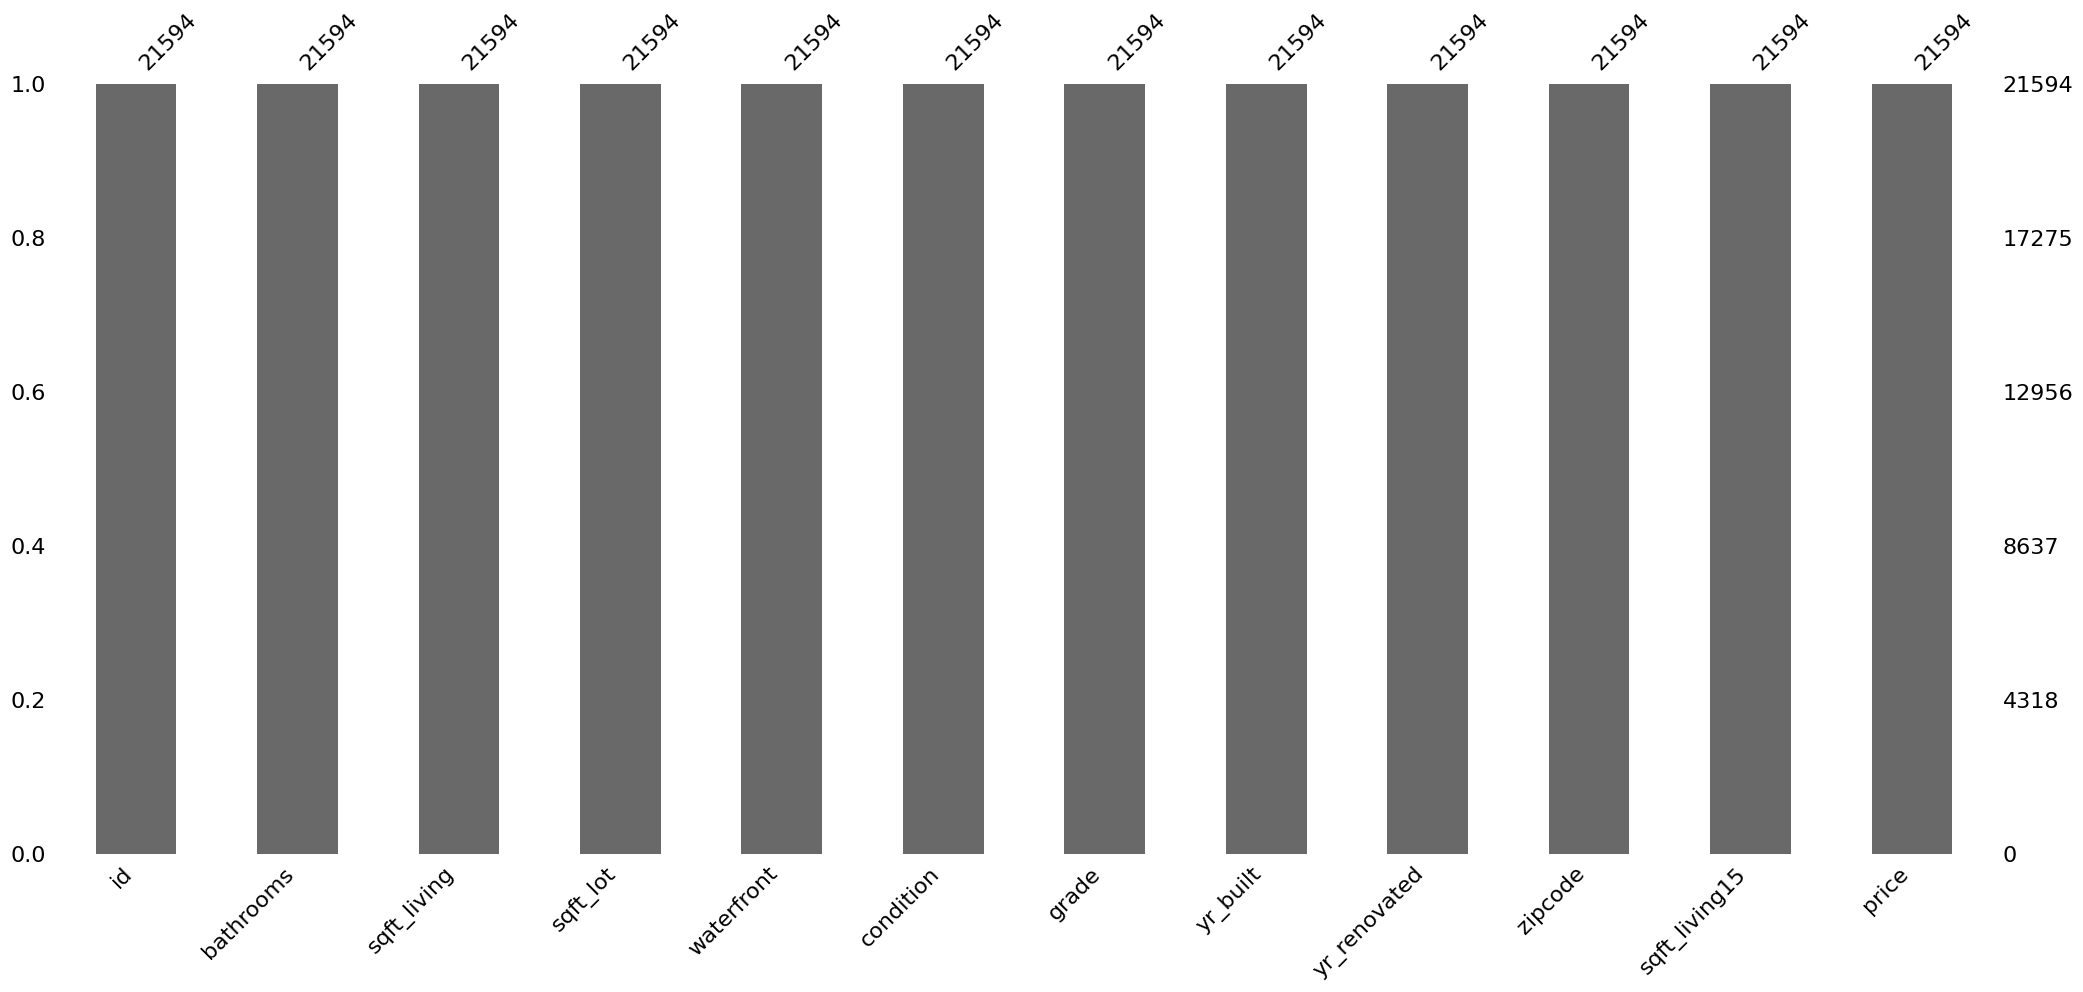

In [293]:
msno.bar(df_dropped_nondup)

In [294]:
df_dropped_nondup['waterfront'].unique()

array([False,  True])

##### Summary of changes:
- dropped columns that I don't need
- cleaned datatypes to be consistent throughout columns
- replaced NaN values with assumed best option (0 for waterfront and yr_renovated, for waterfront it will become clearer if I have enough time to use maps to visualize the houses)

### Applying Client Requests to the Data

- ~~to calculate the distance between houses from latitude and longitude values, I will use haversine function~~
- I will be making another assumption (a very bad one) and say smaller house nearby will be calculated by dividing sqft_living15 by 15. I am doing this only because the other method of calculating the distance with Haversine function and applying that in the DataFrame is too complicated to do for me in such a short time. 

In [307]:
# Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront
sqft_tennis = 7200.00
sqft_pool = 800.00

# 4+ bathrooms or smaller house nearby
df_filt_bathroom = df_dropped_nondup[
    df_dropped_nondup['bathrooms'] >= 4 |
    (df_dropped_nondup['sqft_living'] > (df_dropped_nondup['sqft_living15'] / 15))
    ].reset_index(drop=True)

# big lot
# assuming 7200 + 800 = 8000 sqft takes about 1/3 of the lot 
df_filt_big_lot = df_filt_bathroom[
    df_filt_bathroom['sqft_lot'] > 24000
].reset_index(drop=True)

# historic
df_filt_historic = df_filt_big_lot[
    (2024 - df_filt_big_lot['yr_built']) >= 50
].reset_index(drop=True)

# no waterfront 
df_no_water = df_filt_historic[
    df_filt_historic['waterfront'] == False
    ].reset_index(drop=True)
# replace False with 0 
df_no_water['waterfront'] = df_no_water['waterfront'].replace(False, 0)

# nearby golf (experimental)
df_near_golf = df_no_water[
    df_no_water['zipcode'].isin(df_golf['zipcode'])]

df_unfiltered = df_dropped_nondup
df_final = df_near_golf

df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 580
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             76 non-null     int64  
 1   bathrooms      76 non-null     float64
 2   sqft_living    76 non-null     float64
 3   sqft_lot       76 non-null     float64
 4   waterfront     76 non-null     int64  
 5   condition      76 non-null     int64  
 6   grade          76 non-null     int64  
 7   yr_built       76 non-null     int64  
 8   yr_renovated   76 non-null     int64  
 9   zipcode        76 non-null     int64  
 10  sqft_living15  76 non-null     float64
 11  price          76 non-null     float64
dtypes: float64(5), int64(7)
memory usage: 7.7 KB


## Relationships in the Data 

### Correlation Matrix

In [296]:
# computing and printing the correlation matrix
correlation_matrix_unfiltered = df_unfiltered.corr()
correlation_matrix_client = df_final.corr()

# creating masks to remove upper triangle
mask1 = np.triu(np.ones_like(correlation_matrix_unfiltered, dtype=bool))
mask2 = np.triu(np.ones_like(correlation_matrix_client, dtype=bool))

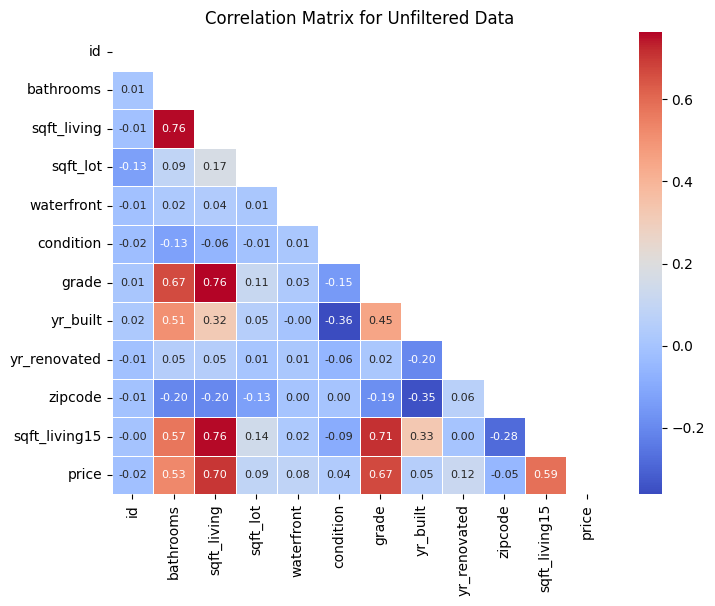

In [297]:
# plotting the correlation matrix for unfiltered
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_unfiltered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size":8}, mask= mask1)
plt.title('Correlation Matrix for Unfiltered Data')
plt.show()

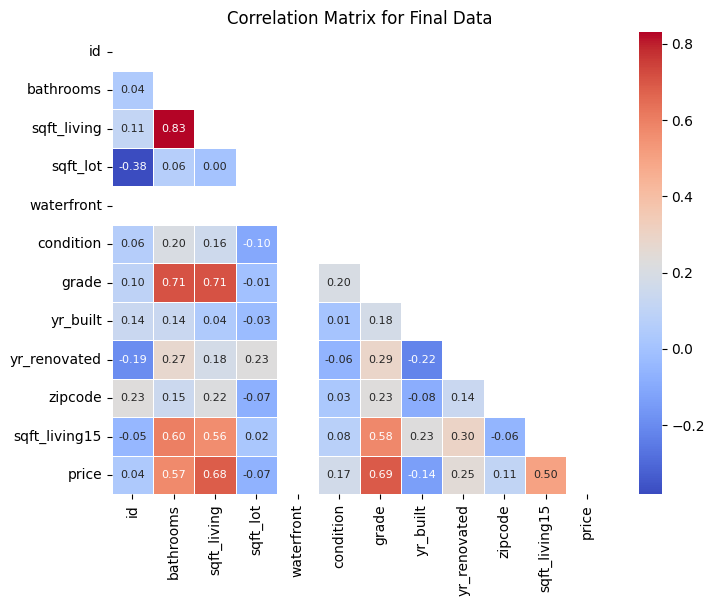

In [298]:
# plotting the correlation matrix for final
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_client, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size":8}, mask= mask2)
plt.title('Correlation Matrix for Final Data')
plt.show()

### Plotting Some Graphs to Investigate the Research Questions/Hypotheses

Number of bathrooms vs. Price

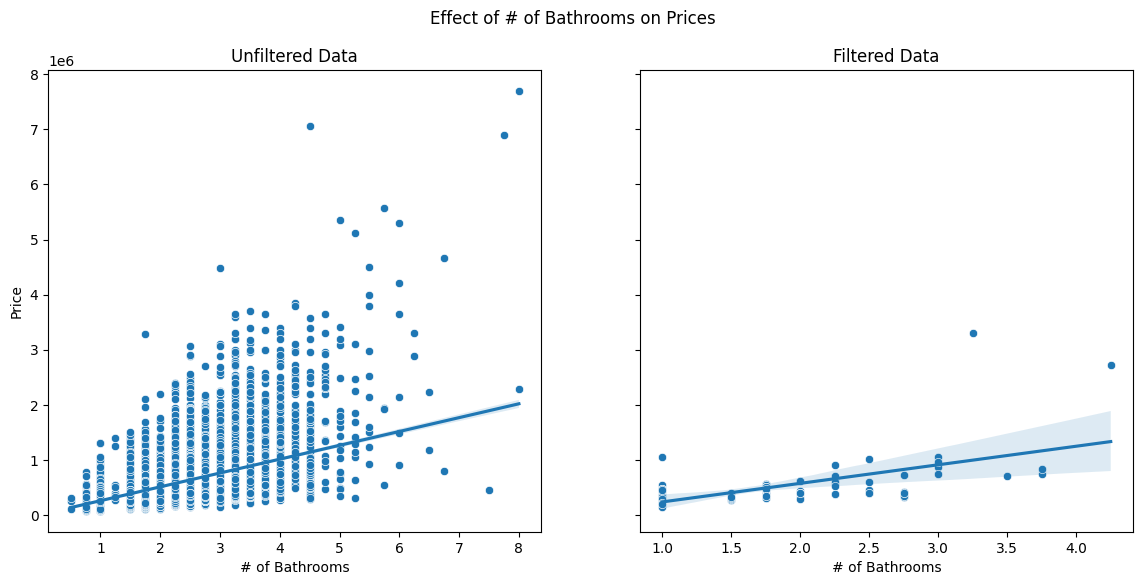

In [299]:
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# unfiltered plot
sns.scatterplot(x='bathrooms', y='price', data=df_unfiltered, ax=axes[0])
sns.regplot(x='bathrooms',y= 'price', data=df_unfiltered, scatter=False, ax=axes[0])
axes[0].set_title('Unfiltered Data')
axes[0].set_xlabel('# of Bathrooms')
axes[0].set_ylabel('Price')

# final plot 
sns.scatterplot(x='bathrooms', y='price', data=df_final, ax=axes[1])
sns.regplot(x='bathrooms',y= 'price', data=df_final, scatter=False, ax=axes[1])
axes[1].set_title('Filtered Data')
axes[1].set_xlabel('# of Bathrooms')
axes[1].set_ylabel('Price')

plt.suptitle('Effect of # of Bathrooms on Prices')
plt.show()

Sqft living vs. Price

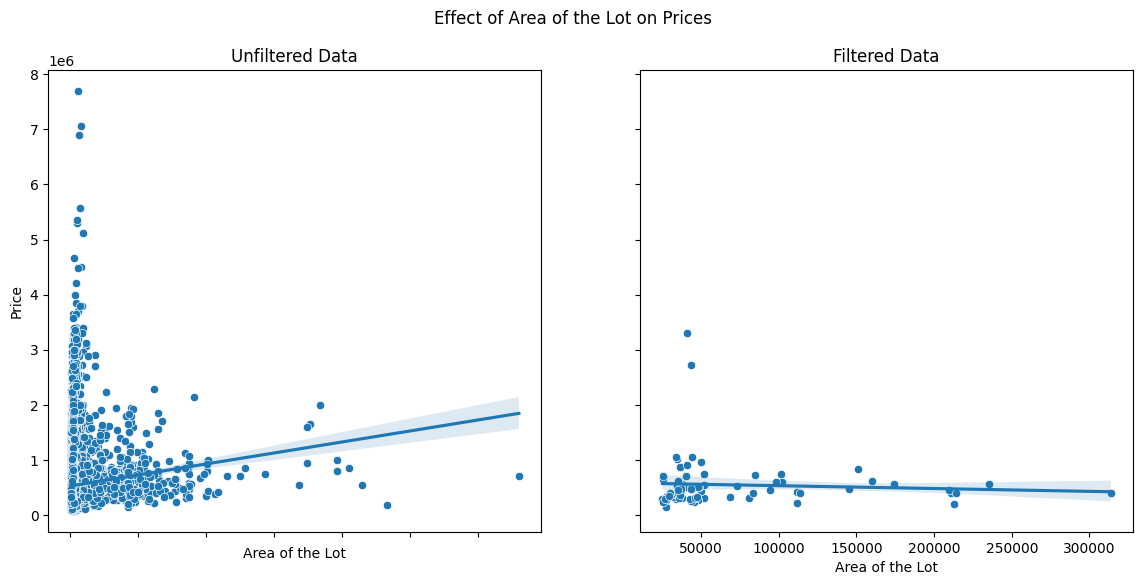

In [339]:
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# unfiltered plot
sns.scatterplot(x='sqft_lot', y='price', data=df_unfiltered, ax=axes[0])
sns.regplot(x='sqft_lot',y= 'price', data=df_unfiltered, scatter=False, ax=axes[0])
axes[0].set_title('Unfiltered Data')
axes[0].set_xlabel('Area of the Lot')
axes[0].set_ylabel('Price')
axes[0].set_xticklabels([])


# final plot 
sns.scatterplot(x='sqft_lot', y='price', data=df_final, ax=axes[1])
sns.regplot(x='sqft_lot',y= 'price', data=df_final, scatter=False, ax=axes[1])
axes[1].set_title('Filtered Data')
axes[1].set_xlabel('Area of the Lot')
axes[1].set_ylabel('Price')

plt.suptitle('Effect of Area of the Lot on Prices')
plt.show()

zipcode vs. price (golf court)

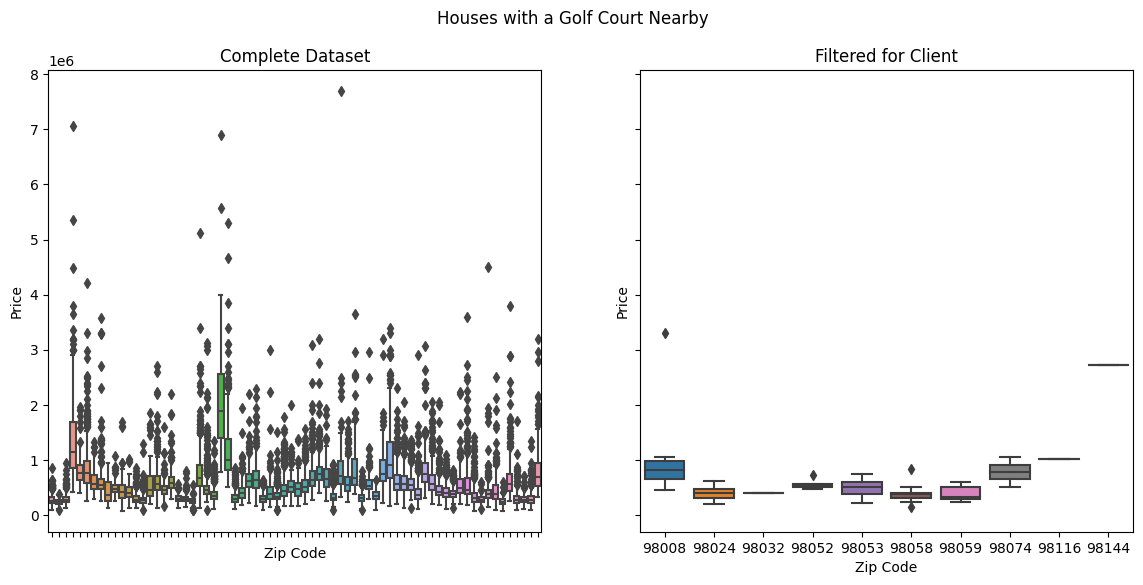

In [316]:
# create subplots 
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# unfiltered first
sns.boxplot(x='zipcode', y='price', data=df_unfiltered, ax=axes[0])
axes[0].set_xticklabels([])
axes[0].set_title('Complete Dataset')
axes[0].set_xlabel('Zip Code')
axes[0].set_ylabel('Price')

#filtered list
sns.boxplot(x='zipcode', y='price', data=df_final, ax=axes[1])
axes[1].set_title('Filtered for Client')
axes[1].set_xlabel('Zip Code')
axes[1].set_ylabel('Price')

plt.suptitle('Houses with a Golf Court Nearby')
plt.show()

House age vs. price (renovation effect)

In [342]:
# create df for not renovated and renovated houses
df_reno_yes = df_final[df_final['yr_renovated'] > 0].sort_values(by='yr_built').reset_index(drop=True)
df_reno_no = df_final[df_final['yr_renovated'] == 0].sort_values(by='yr_built').reset_index(drop=True)

df_reno_yes['yr_built'] = pd.Categorical(df_reno_yes['yr_built'], categories=sorted(df_reno_yes['yr_built'].unique()), ordered=True)
df_reno_no['yr_built'] = pd.Categorical(df_reno_no['yr_built'], categories=sorted(df_reno_no['yr_built'].unique()), ordered=True)


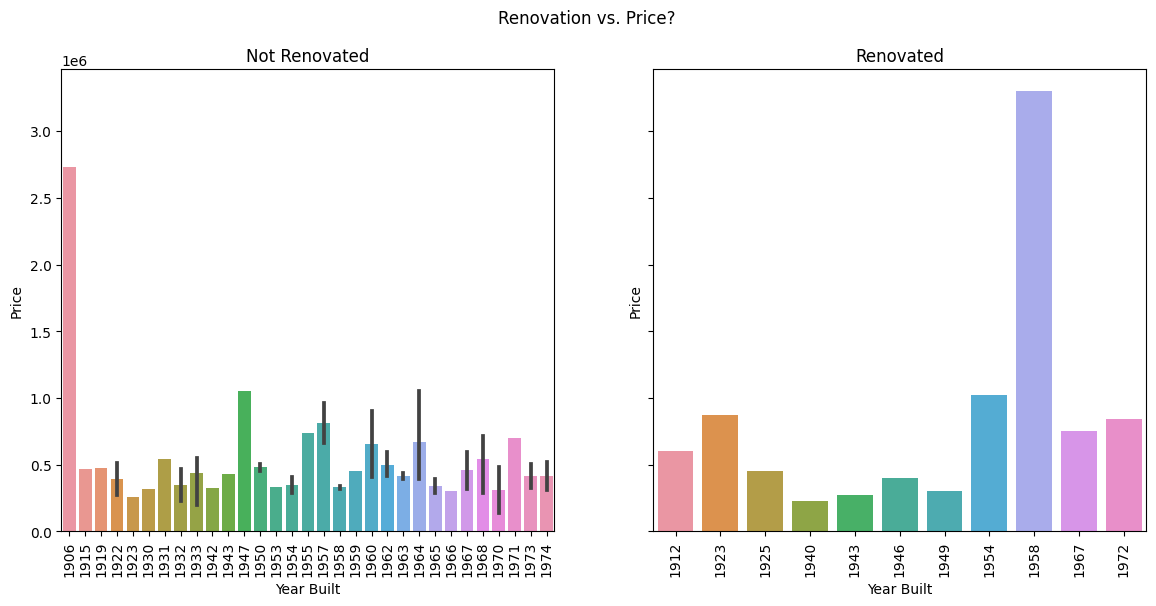

In [347]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# no renovation
sns.barplot(x='yr_built', y='price', data=df_reno_no, ax=axes[0])
axes[0].set_title('Not Renovated')
axes[0].set_xlabel('Year Built')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)


# renovated
sns.barplot(x='yr_built', y='price', data=df_reno_yes, ax=axes[1])
axes[1].set_title('Renovated')
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)



plt.suptitle('Renovation vs. Price?')
plt.show()


## Presentation